In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, PowerTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
enc = OrdinalEncoder()
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR, SVC


import warnings 
warnings.filterwarnings('ignore')

In [2]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

In [3]:
df = pd.read_csv('customer_retention_dataset.csv')
df

,Gender,Age,City,pin_code,shopping_exp,last_year_online_shopping,internet_type,device,screen_size,operating_system,...,logged_in_time,displaying_time,price_declaration,page_loading_time,Limited_mode_of_payment,Longer_delivery_period,Change_in_website,Frequent_disruption,Website_efficiency,indian_online_retailer_recommendation
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,Female,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,Male,21-30 years,Karnal,132001,3-4 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,Female,21-30 years,Bangalore,530068,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,Female,21-30 years,Solan,173212,1-2 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,Android,...,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in
265,Female,31-40 years,Ghaziabad,201008,1-2 years,31-40 times,Mobile Internet,Smartphone,Others,Android,...,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com
266,Female,41-50 yaers,Bangalore,560010,2-3 years,Less than 10 times,Mobile internet,Laptop,Others,Window/windows Mobile,...,Amazon.in,Snapdeal.com,Amazon.in,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Amazon.in
267,Female,Less than 20 years,Solan,173229,2-3 years,Less than 10 times,Wi-Fi,Smartphone,5.5 inches,Android,...,Amazon.in,"Amazon.in, Myntra.com, Snapdeal.com",Amazon.in,"Amazon.in, Snapdeal.com",Amazon.in,Amazon.in,Amazon.in,"Myntra.com, Snapdeal.com","Myntra.com, Snapdeal.com",Amazon.in


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Gender                                 269 non-null    object
 1   Age                                    269 non-null    object
 2   City                                   269 non-null    object
 3   pin_code                               269 non-null    int64 
 4   shopping_exp                           269 non-null    object
 5   last_year_online_shopping              269 non-null    object
 6   internet_type                          269 non-null    object
 7   device                                 269 non-null    object
 8   screen_size                            269 non-null    object
 9   operating_system                       269 non-null    object
 10  browser                                269 non-null    object
 11  channel_to_reach   

Every Column other than Pincode is a Object

In [5]:
df.isnull().sum()

Gender                                   0
Age                                      0
City                                     0
pin_code                                 0
shopping_exp                             0
                                        ..
Longer_delivery_period                   0
Change_in_website                        0
Frequent_disruption                      0
Website_efficiency                       0
indian_online_retailer_recommendation    0
Length: 71, dtype: int64

There is no Null Values present in the database hence we can move a head

In [6]:
columns = df.columns
columns

Index(['Gender', 'Age', 'City', 'pin_code', 'shopping_exp',
       'last_year_online_shopping', 'internet_type', 'device', 'screen_size',
       'operating_system', 'browser', 'channel_to_reach', 'channel_to_use',
       'spent_time', 'payment_mode', 'abandon_times', 'abandon_reason',
       'website_content', 'similar_product_info', 'seller_info',
       'product_info', 'ease_navigation', 'loading_speed', 'website_interface',
       'convenient_payment', 'website_trust', 'Empathy', 'customer_privacy',
       'responsiveness', 'discounts', 'experience', 'convenience',
       'return_replacement', 'loyalty_programs', 'quality_information',
       'derive_satisfaction', 'net_benefit', 'trust', 'product_variety',
       'complete_product_information', 'monetary_savings',
       'convenience_patronizing', 'sense_adventure', 'social_status',
       'gratification', 'certain_roles', 'value_for_money',
       'online_retailers_shoppers', 'easy_to_use_website',
       'appealing_webpage_layout

In [7]:
for i in columns:
    a=df[i].value_counts()
    b=len(a.index)
    print(i,'column has',b,'categorical data counts\n')

Gender column has 2 categorical data counts

Age column has 5 categorical data counts

City column has 11 categorical data counts

pin_code column has 39 categorical data counts

shopping_exp column has 5 categorical data counts

last_year_online_shopping column has 6 categorical data counts

internet_type column has 4 categorical data counts

device column has 4 categorical data counts

screen_size column has 4 categorical data counts

operating_system column has 3 categorical data counts

browser column has 4 categorical data counts

channel_to_reach column has 3 categorical data counts

channel_to_use column has 5 categorical data counts

spent_time column has 5 categorical data counts

payment_mode column has 3 categorical data counts

abandon_times column has 4 categorical data counts

abandon_reason column has 5 categorical data counts

website_content column has 4 categorical data counts

similar_product_info column has 4 categorical data counts

seller_info column has 5 categor

##### Gender, Age, City, shopping_exp, last_year_online_shopping, internet_type, device, screen_size, operating_system, browser, channel_to_reach, channel_to_use, spent_time, payment_mode, abandon_times, abandon_reason, website_content, similar_product_info, seller_info, product_info, ease_navigation, loading_speed, website_interface, convenient_payment, website_trust, Empathy,  customer_privacy, responsiveness, discounts, experience, convenience, return_replacement, loyalty_programs, quality_information, derive_satisfaction, net_benefit, trust, value_for_money, certain_roles, gratification, social_status, sense_adventure, convenience_patronizing, monetary_savings, complete_product_information and product_variety are the categorical columns

In [8]:
df = df.replace('Agree (4)',4)
df = df.replace('Strongly agree (5)',5)
df = df.replace('indifferent (3)',3)
df = df.replace('Dis-agree (2)',2)
df = df.replace('Strongly disagree (1)',1)
df = df.replace('Indifferent (3)',3)
df = df.replace('Disagree (2)',2)
df = df.replace('indifferent  (3)',3)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Gender                                 269 non-null    object
 1   Age                                    269 non-null    object
 2   City                                   269 non-null    object
 3   pin_code                               269 non-null    int64 
 4   shopping_exp                           269 non-null    object
 5   last_year_online_shopping              269 non-null    object
 6   internet_type                          269 non-null    object
 7   device                                 269 non-null    object
 8   screen_size                            269 non-null    object
 9   operating_system                       269 non-null    object
 10  browser                                269 non-null    object
 11  channel_to_reach   

In [10]:
df['hedonic_value'] = df['gratification']+df['certain_roles']+df['discounts']+df['social_status']+df['sense_adventure']

In [11]:
df['utilitarian_value'] = df['product_variety']+df['convenience']+df['complete_product_information']+df['monetary_savings']

In [12]:
df['customer_retention_points'] = df['hedonic_value'] + df['utilitarian_value']

In [13]:
df['utilitarian_value_percent'] = ((df['utilitarian_value']/df['customer_retention_points'])*100)

In [14]:
df['hedonic_value_percent'] = ((df['hedonic_value']/df['customer_retention_points'])*100)

In [15]:
df1 = df.copy()

In [16]:
df1 = df1[['Gender', 'Age', 'City', 'shopping_exp', 'last_year_online_shopping', 'internet_type', 'device', 'screen_size', 'operating_system', 'browser', 'channel_to_reach', 'channel_to_use', 'spent_time', 'payment_mode', 'abandon_times', 'abandon_reason','customer_retention_points','hedonic_value_percent','utilitarian_value_percent']]

In [17]:
by_Gender = df1.groupby('Gender')
by_Gender.mean().sort_values(by='customer_retention_points',ascending=False)

,customer_retention_points,hedonic_value_percent,utilitarian_value_percent
Gender,,,
Female,35.176796,49.377349,50.622651
Male,33.340909,52.148648,47.851352


- The above table shows that Female tends use same retail store for buying products since their customer_retention_points are more than the male.
- Utilitarian value plays major role for Female customer_retention_points.
- For Male audience also Utilitarian value plays an important role in increasing overall customer_retention_points.

In [18]:
by_shopping_exp = df1.groupby('shopping_exp')
by_shopping_exp.mean().sort_values(by='customer_retention_points',ascending=False)

,customer_retention_points,hedonic_value_percent,utilitarian_value_percent
shopping_exp,,,
3-4 years,35.446809,50.789929,49.210071
2-3 years,35.169231,49.723226,50.276774
1-2 years,35.000000,54.031385,45.968615
Above 4 years,34.102041,49.925636,50.074364
Less than 1 year,33.651163,50.000705,49.999295


- It can be observe that the people using Online shopping platform from last 3-4 years tends to have the highest customer_retention_points and Utilitarian value plays an important role in increasing customer_retention_points
- People using online retailers from last less than a year have the lowest customer_retention_points.

In [19]:
by_Age = df1.groupby('Age')
by_Age.mean().sort_values(by='customer_retention_points',ascending=False)

,customer_retention_points,hedonic_value_percent,utilitarian_value_percent
Age,,,
Less than 20 years,38.050000,53.402178,46.597822
21-30 years,34.772152,50.008369,49.991631
41-50 yaers,34.642857,48.990925,51.009075
31-40 years,34.123457,52.077253,47.922747
51 years and above,31.789474,45.266011,54.733989


- It is obeserved that people whoes age is less than 20 years are easy to retain as compare to group of people who are older than 51.
- Utilitarian Value have more impact on all the age groups compare to Hedonic value.

In [20]:
by_City = df1.groupby('City')
by_City.mean().sort_values(by='customer_retention_points',ascending=False)

,customer_retention_points,hedonic_value_percent,utilitarian_value_percent
City,,,
Ghaziabad,42.055556,55.951506,44.048494
Karnal,35.259259,53.124059,46.875941
Bangalore,34.810811,46.717508,53.282492
Greater Noida,34.651163,47.011219,52.988781
Noida,34.350000,52.755190,47.244810
Delhi,34.241379,50.755102,49.244898
Solan,33.555556,53.230070,46.769930
Merrut,32.111111,47.737776,52.262224
Gurgaon,30.500000,44.485848,55.514152


- People living in Ghaziabad has the highest customer_retention_points and hedonic value plays imp role in the contribution of customer_retention_points.
- It can be observed that except Ghaziabad other cities have greater Utilitarian value than hedonic value. 

In [21]:
by_device = df1.groupby('device')
by_device.mean().sort_values(by='customer_retention_points',ascending=False)

,customer_retention_points,hedonic_value_percent,utilitarian_value_percent
device,,,
Smartphone,37.212766,52.159337,47.840663
Tablet,33.000000,52.320032,47.679968
Laptop,32.232558,48.429918,51.570082
Desktop,29.533333,45.970045,54.029955


- People using Smartphone are the customers who are loyal and satisfied with the services of online retailers as compare to people who are using Tablet, Laptop and Desktop.
- we can conclude that Online retailers should focus on their website for people using Desktop to increase the customer retention.

In [22]:
by_screen_size = df1.groupby('screen_size')
by_screen_size.mean().sort_values(by='customer_retention_points',ascending=False)

,customer_retention_points,hedonic_value_percent,utilitarian_value_percent
screen_size,,,
4.7 inches,37.137931,48.436425,51.563575
5.5 inches,37.070707,53.079446,46.920554
Others,32.447761,48.760995,51.239005
5 inches,29.428571,47.555191,52.444809


- Smartphone those are having 4.7 inches of screensize are more satisfied than the others who has different screen sizes.
- Online retailers should focus on the website or application to make it more appealing for the customers who are using other than 4.7 inches of screen.

In [23]:
by_operating_system = df1.groupby('operating_system')
by_operating_system.mean().sort_values(by='customer_retention_points',ascending=False)

,customer_retention_points,hedonic_value_percent,utilitarian_value_percent
operating_system,,,
Android,37.552941,51.965656,48.034344
IOS/Mac,35.806452,51.059136,48.940864
Window/windows Mobile,31.877049,48.718312,51.281688


- Customers who are using Android are more safisfied with the experience, So companies should focus on the IOS or Windows app/web experience.

In [24]:
by_browser = df1.groupby('browser')
by_browser.mean().sort_values(by='customer_retention_points',ascending=False)

,customer_retention_points,hedonic_value_percent,utilitarian_value_percent
browser,,,
Safari,34.87500,51.767677,48.232323
Google chrome,34.87037,49.761719,50.238281
Mozilla Firefox,30.00000,50.000000,50.000000
Opera,28.00000,57.142857,42.857143


- People who are using Safari Browser have more customer_retention_points as compare to others.
- As we have seen in the previous observation that the desktop customers are not satisfied to by combining these two finding we can conclude that only those People who are using desktop and other than the Safari brower are not satisfied.

In [25]:
by_channel_to_reach = df1.groupby('channel_to_reach')
by_channel_to_reach.mean().sort_values(by='customer_retention_points',ascending=False)

,customer_retention_points,hedonic_value_percent,utilitarian_value_percent
channel_to_reach,,,
Search Engine,35.082609,50.162696,49.837304
Content Marketing,32.250000,46.590909,53.409091
Display Adverts,30.894737,55.639098,44.360902


- Those customers who has high customer_retention_points are using Search Engine to reach the website.


In [26]:
by_channel_to_use = df1.groupby('channel_to_use')
by_channel_to_use.mean().sort_values(by='customer_retention_points',ascending=False)

,customer_retention_points,hedonic_value_percent,utilitarian_value_percent
channel_to_use,,,
Via application,39.569767,51.303217,48.696783
Search Engine,32.908046,53.307065,46.692935
Direct URL,32.700000,49.440376,50.559624
E-mail,29.000000,31.034483,68.965517
Social Media,28.000000,57.142857,42.857143


- Those who are using Application to buy products from online retailers have higher customer_retention_points.
- For those who are using application hedonic value is more important in buying experience.

In [27]:
by_spent_time = df1.groupby('spent_time')
by_spent_time.mean().sort_values(by='customer_retention_points',ascending=False)

,customer_retention_points,hedonic_value_percent,utilitarian_value_percent
spent_time,,,
Less than 1 min,42.200000,59.544160,40.455840
1-5 mins,37.000000,51.351351,48.648649
11-15 mins,37.000000,48.406958,51.593042
more than 15 mins,34.300813,49.753657,50.246343
6-10 mins,31.394366,50.251830,49.748170


- Customers spending less than a minut on online retail shop are having higher customer_retention_points

In [28]:
by_payment_mode = df1.groupby('payment_mode')
by_payment_mode.mean().sort_values(by='customer_retention_points',ascending=False)

,customer_retention_points,hedonic_value_percent,utilitarian_value_percent
payment_mode,,,
"E-wallets (Paytm, Freecharge etc.)",36.888889,53.874644,46.125356
Cash on delivery (CoD),35.815789,53.541094,46.458906
Credit/Debit cards,33.236486,47.519588,52.480412


- Customers who are using E-wallets are having high customer_retention_points
- For those who are using E-wallets hedonic value is more important
- Less people tends to experience satisfaction by using Credit/Debit cards

In [29]:
by_abandon_times = df1.groupby('abandon_times')
by_abandon_times.mean().sort_values(by='customer_retention_points',ascending=False)

,customer_retention_points,hedonic_value_percent,utilitarian_value_percent
abandon_times,,,
Very frequently,41.000000,51.219512,48.780488
Never,36.604167,57.066545,42.933455
Frequently,35.000000,47.385281,52.614719
Sometimes,33.356725,48.891284,51.108716


- by looking at the low hedonic value we can conclude that only some customers choose to abandon the use of Online Retailing which is a good thing.

In [30]:
by_abandon_reason = df1.groupby('abandon_reason')
by_abandon_reason.mean().sort_values(by='customer_retention_points',ascending=False)

,customer_retention_points,hedonic_value_percent,utilitarian_value_percent
abandon_reason,,,
Promo code not applicable,39.222222,51.612891,48.387109
No preferred mode of payment,37.000000,51.351351,48.648649
Better alternative offer,33.827068,50.136412,49.863588
Change in price,31.864865,42.525284,57.474716
Lack of trust,31.838710,57.380254,42.619746


- Lack of trust is the main reason to abandon the use of online retailing

In [31]:
df4 = df.drop(df.columns[:47],axis=1)

In [32]:
df4 = df4.drop(['hedonic_value','utilitarian_value','customer_retention_points','utilitarian_value_percent','hedonic_value_percent'],axis=1)

In [33]:
columns = df4.columns

In [34]:
df3 = pd.DataFrame(columns=columns, index=['Amazon.in','Flipkart.com','Snapdeal.com','Myntra.com'])

In [35]:
df3

,online_retailers_shoppers,easy_to_use_website,appealing_webpage_layout,variety_of_product,relevant_product_description,loading_website_speed,Reliability_of_website,Quickness_ of_purchase,payment_options,Speedy_order_delivery,...,logged_in_time,displaying_time,price_declaration,page_loading_time,Limited_mode_of_payment,Longer_delivery_period,Change_in_website,Frequent_disruption,Website_efficiency,indian_online_retailer_recommendation
Amazon.in,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Flipkart.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Snapdeal.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Myntra.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
for i in columns:
    if df[i].dtypes=='object':
        a = (df[i].str.count('Amazon.in')).sum()
        b = (df[i].str.count('Flipkart.com')).sum()
        c = (df[i].str.count('Snapdeal.com')).sum()
        d = (df[i].str.count('Myntra.com')).sum()
        e = (df[i].str.count('Paytm.com')).sum()
        df3.at['Amazon.in',i]=a
        df3.at['Flipkart.com',i]=b
        df3.at['Snapdeal.com',i]=c
        df3.at['Myntra.com',i]=d
        df3.at['Paytm.com',i]=e
        

In [37]:
df3 = df3.T
df3

,Amazon.in,Flipkart.com,Snapdeal.com,Myntra.com,Paytm.com
online_retailers_shoppers,269,221,182,146,150
easy_to_use_website,249,201,130,147,125
appealing_webpage_layout,227,175,61,115,67
variety_of_product,220,184,14,64,20
relevant_product_description,238,194,59,64,59
loading_website_speed,249,162,81,74,99
Reliability_of_website,227,146,45,64,96
Quickness_ of_purchase,0,158,0,79,107
payment_options,215,203,90,132,0
Speedy_order_delivery,240,162,50,29,0


#### Findings on Online Retail Store

1. Highest number of customers have used Amazon.in.
2. Amazon.in is the easy to use Website.
3. Amazon.in have the appealing webpage layout.
4. Amazon.in has more variety of products.
5. Amazon.in has a more relevant product description compare to others.
6. Amazon.in has the fastest loading website speed.
7. Amazon.in is the most reliable website.
8. Flipkart.com has the fastest quickness of purchase.
9. Amazon.in has most payment options.
10. Amazon.in has fastest delivery time.
11. Amazon.in has high privacy of customer information.
12. Amazon.in has high security of customer's financial information.
13. Amazon.in has the highest Perceived Trustworthiness.
14. Amazon.in has the best online assistance.
15. Amazon.in has the highest logged in time.
16. Amazon.in longest time in displaying graphics and photos.
17. Myntra.com has late declaration of price.
18. Paytm.com has longest page loading time.
19. Snapdeal.com has low mode of payments.
20. Snapdeal.com has the longest delivery time.
21. Amazon.in has most number of changes on the website.
22. Amazon.in has the frequent disruption when moving from one page to another.
23. Amazon.in is the most efficient website.
24. As per the survey customers would recommend Amazon.in to their friends.

In [38]:
df5 = df.drop(df.columns[47:],axis=1)

In [39]:
df5 = df5.drop(df.columns[:17],axis=1)

In [40]:
df5 = df5.drop([])

In [41]:
df5 = df5.drop(['gratification','certain_roles','discounts','social_status','sense_adventure','product_variety','convenience','complete_product_information','monetary_savings'],axis=1)

In [42]:
df5

,website_content,similar_product_info,seller_info,product_info,ease_navigation,loading_speed,website_interface,convenient_payment,website_trust,Empathy,...,responsiveness,experience,return_replacement,loyalty_programs,quality_information,derive_satisfaction,net_benefit,trust,convenience_patronizing,value_for_money
0,4,3,3,4,4,1,2,2,2,5,...,4,1,2,4,3,5,4,5,3,5
1,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,3,5
2,5,4,4,4,4,4,5,5,5,5,...,5,5,5,5,5,5,5,4,4,4
3,4,4,3,4,5,4,5,5,4,5,...,4,3,4,3,3,4,3,4,4,4
4,5,3,3,4,4,5,5,5,4,5,...,5,5,5,2,4,5,5,5,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,4,4,4,4,4,4,4,4,4,4,...,4,3,2,3,3,2,3,4,3,3
265,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
266,5,5,4,4,5,4,4,5,4,3,...,4,3,5,3,4,4,4,4,4,4
267,5,4,5,4,4,4,5,5,5,5,...,5,4,4,4,5,5,5,5,4,3


In [43]:
columns = df5.columns

In [44]:
for i in columns:
    a = (df[i].mode().sum())
    if a == 1:
        print('Majority people are Strongly Disagree with the',i,'column\n')
    if a == 2:
        print('Majority people are Disagree with the',i,'column\n')
    if a == 3:
        print('Majority people are Neutral with the',i,'column\n')
    if a == 4:
        print('Majority people are Agree with the',i,'column\n')
    if a == 5:
        print('Majority people are Strongly Agree with the',i,'column\n')
         
    

Majority people are Strongly Agree with the website_content column

Majority people are Strongly Agree with the similar_product_info column

Majority people are Agree with the seller_info column

Majority people are Agree with the product_info column

Majority people are Strongly Agree with the ease_navigation column

Majority people are Strongly Agree with the loading_speed column

Majority people are Strongly Agree with the website_interface column

Majority people are Strongly Agree with the convenient_payment column

Majority people are Strongly Agree with the website_trust column

Majority people are Strongly Agree with the Empathy column

Majority people are Strongly Agree with the customer_privacy column

Majority people are Strongly Agree with the responsiveness column

Majority people are Strongly Agree with the experience column

Majority people are Strongly Agree with the return_replacement column

Majority people are Strongly Agree with the loyalty_programs column

Majority

In [45]:
df6 = df[(df.columns[17:47])]

In [46]:
df6['customer_retention_points'] = df['customer_retention_points']

In [47]:
df6

,website_content,similar_product_info,seller_info,product_info,ease_navigation,loading_speed,website_interface,convenient_payment,website_trust,Empathy,...,product_variety,complete_product_information,monetary_savings,convenience_patronizing,sense_adventure,social_status,gratification,certain_roles,value_for_money,customer_retention_points
0,4,3,3,4,4,1,2,2,2,5,...,3,3,2,3,4,4,5,4,5,30
1,5,5,5,5,5,5,5,5,5,5,...,5,5,5,3,3,3,5,5,5,41
2,5,4,4,4,4,4,5,5,5,5,...,5,5,5,4,4,4,3,3,4,39
3,4,4,3,4,5,4,5,5,4,5,...,4,4,5,4,4,5,4,3,4,36
4,5,3,3,4,4,5,5,5,4,5,...,4,4,5,4,3,1,5,1,5,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,4,4,4,4,4,4,4,4,4,4,...,4,3,2,3,2,4,3,4,3,28
265,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,45
266,5,5,4,4,5,4,4,5,4,3,...,3,5,4,4,2,3,4,4,4,33
267,5,4,5,4,4,4,5,5,5,5,...,5,4,4,4,4,3,3,4,3,37


In [48]:
df6.describe()

,website_content,similar_product_info,seller_info,product_info,ease_navigation,loading_speed,website_interface,convenient_payment,website_trust,Empathy,...,product_variety,complete_product_information,monetary_savings,convenience_patronizing,sense_adventure,social_status,gratification,certain_roles,value_for_money,customer_retention_points
count,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,...,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000
mean,4.382900,4.137546,3.873606,4.107807,4.286245,4.115242,4.394052,4.368030,4.256506,4.464684,...,4.148699,4.349442,4.263941,3.914498,3.553903,3.223048,3.501859,3.282528,4.163569,34.576208
std,1.046603,0.918123,1.068027,1.082206,1.059708,1.064045,1.162586,0.951364,0.976021,1.080551,...,0.842110,0.755953,1.000485,0.693879,1.065869,1.219581,1.141564,1.178995,0.648773,4.669562
min,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,...,2.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,3.000000,27.000000
25%,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,31.000000
50%,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,...,4.000000,5.000000,5.000000,4.000000,4.000000,3.000000,3.000000,3.000000,4.000000,33.000000
75%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,39.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,45.000000


In [49]:
x = df6.drop(['customer_retention_points'],axis=1)
y = df6['customer_retention_points']

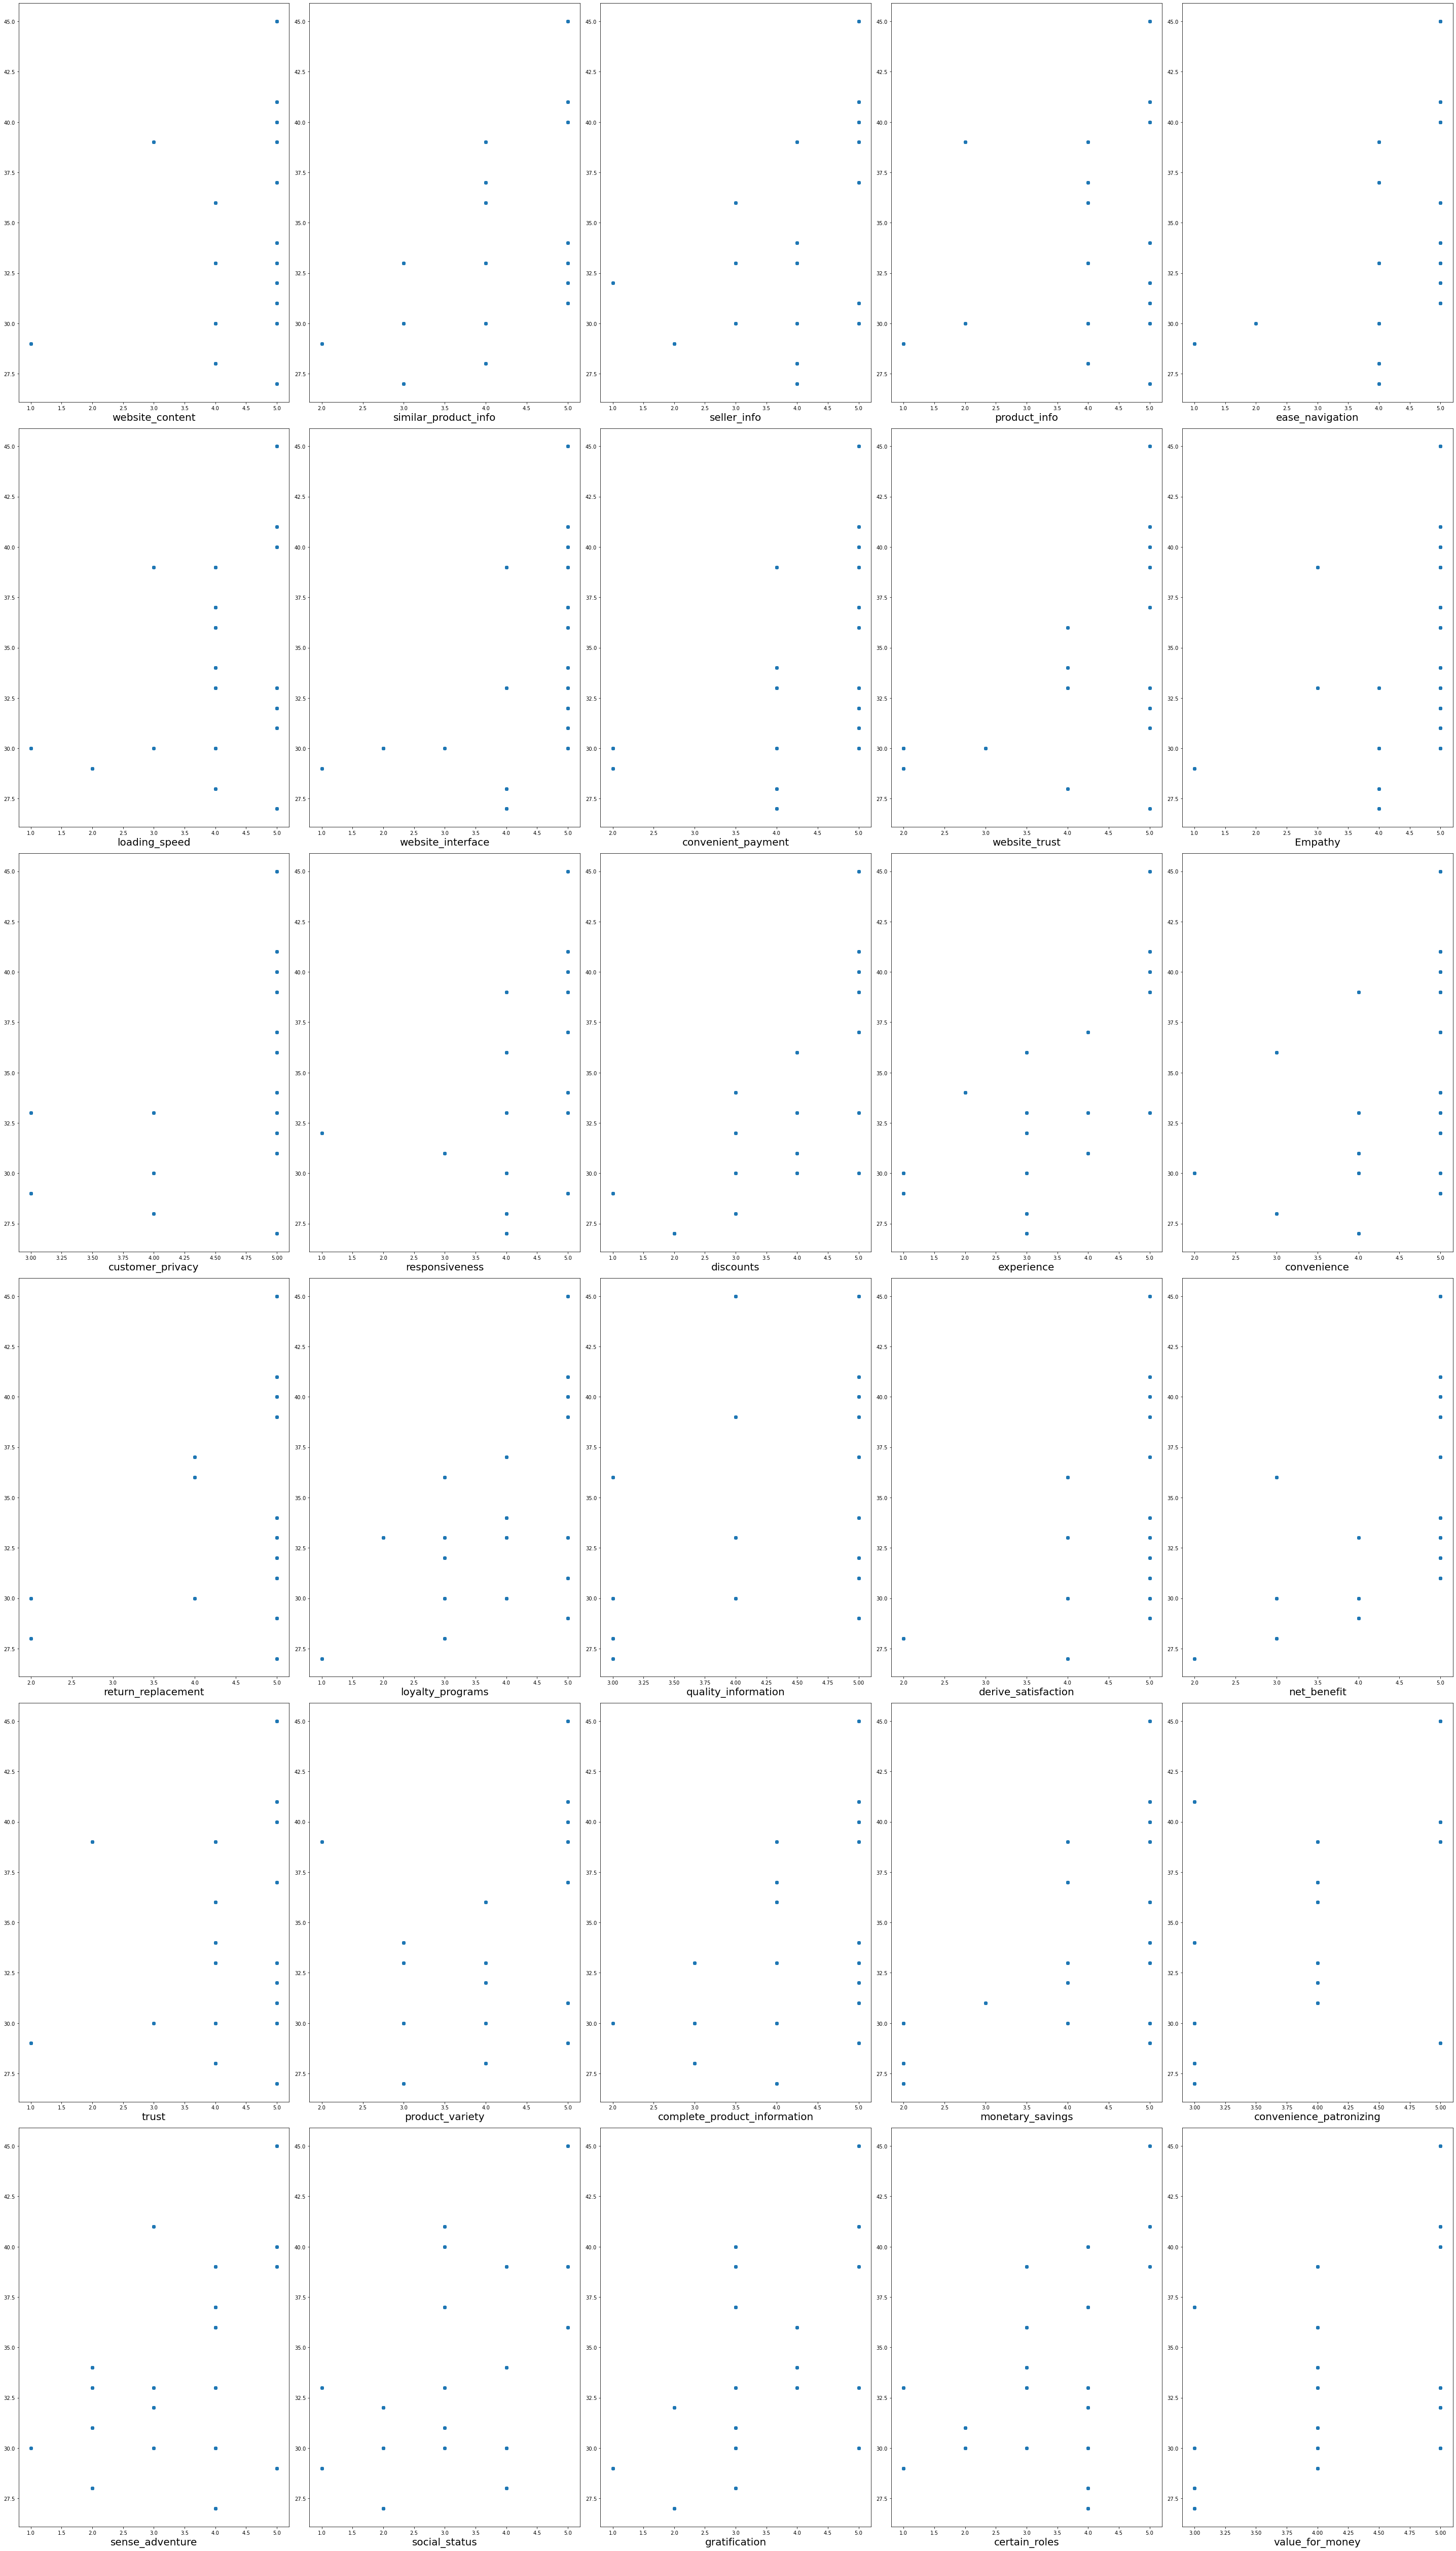

In [50]:
plt.figure(figsize=(40,70), facecolor='white')

plotno = 1

for column in x:
    if plotno <= 30:
        ax = plt.subplot(6,5,plotno)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        
    plotno+=1
plt.tight_layout()

sense_adventure and social_status has less co-relation with customer_retention_points

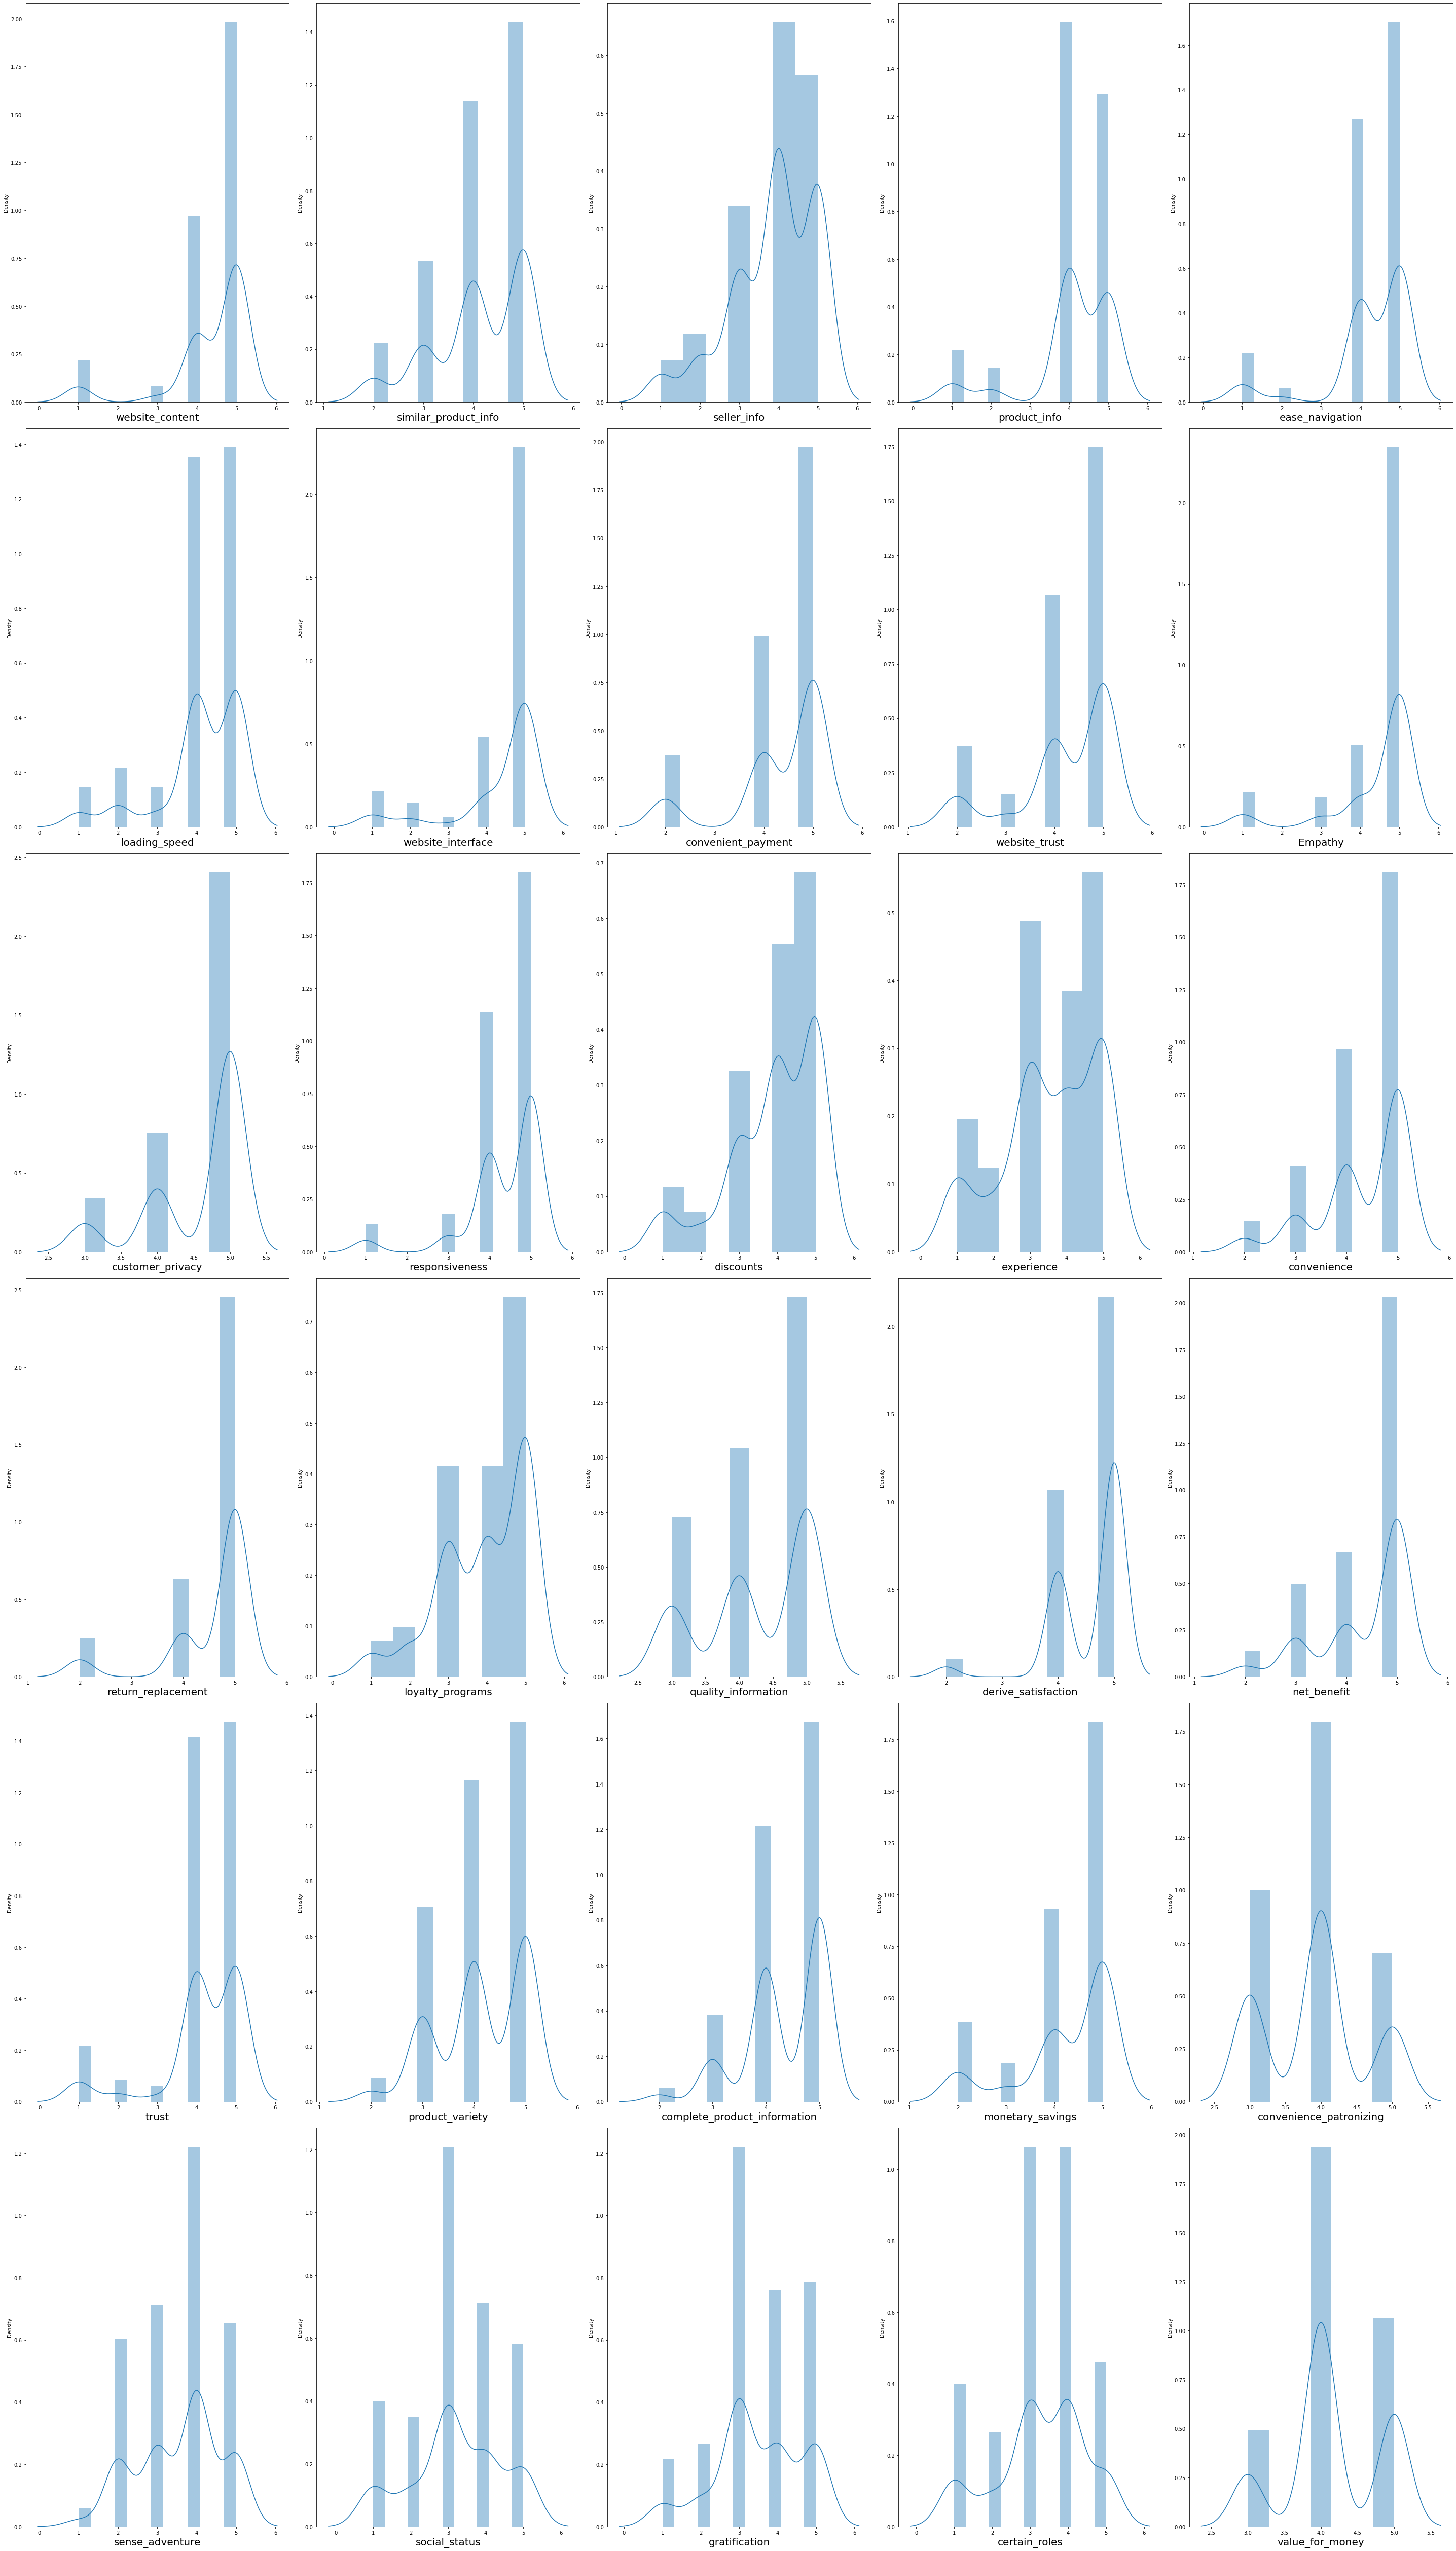

In [51]:
plt.figure(figsize=(40,70), facecolor='white')

plotno = 1

for column in x:
    if plotno <= 30:
        ax = plt.subplot(6,5,plotno)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20)
        
    plotno+=1
plt.tight_layout()

In [66]:
df6.skew()

website_content                -2.234127
similar_product_info           -0.801079
seller_info                    -0.893446
product_info                   -1.710957
ease_navigation                -2.052560
loading_speed                  -1.467621
website_interface              -2.015996
convenient_payment             -1.581400
website_trust                  -1.261484
Empathy                        -2.294982
customer_privacy               -1.355737
responsiveness                 -2.104016
discounts                      -1.052475
experience                     -0.565041
convenience                    -1.121619
return_replacement             -2.243625
loyalty_programs               -0.853530
quality_information            -0.555681
derive_satisfaction            -1.989886
net_benefit                    -1.180598
trust                          -1.814791
product_variety                -0.551863
complete_product_information   -0.940104
monetary_savings               -1.247623
convenience_patr

In [52]:
df6.drop('customer_retention_points',axis=1).corrwith(df6.customer_retention_points)

website_content                 0.367739
similar_product_info            0.507999
seller_info                     0.480027
product_info                    0.302949
ease_navigation                 0.437828
loading_speed                   0.354566
website_interface               0.513380
convenient_payment              0.547596
website_trust                   0.538090
Empathy                         0.423720
customer_privacy                0.519247
responsiveness                  0.374765
discounts                       0.728090
experience                      0.681991
convenience                     0.369228
return_replacement              0.296028
loyalty_programs                0.492714
quality_information             0.338781
derive_satisfaction             0.394231
net_benefit                     0.502921
trust                           0.287510
product_variety                 0.411777
complete_product_information    0.408905
monetary_savings                0.579920
convenience_patr

Every Feature contributes to the total customer retention points means each and every column is important in analysing the label

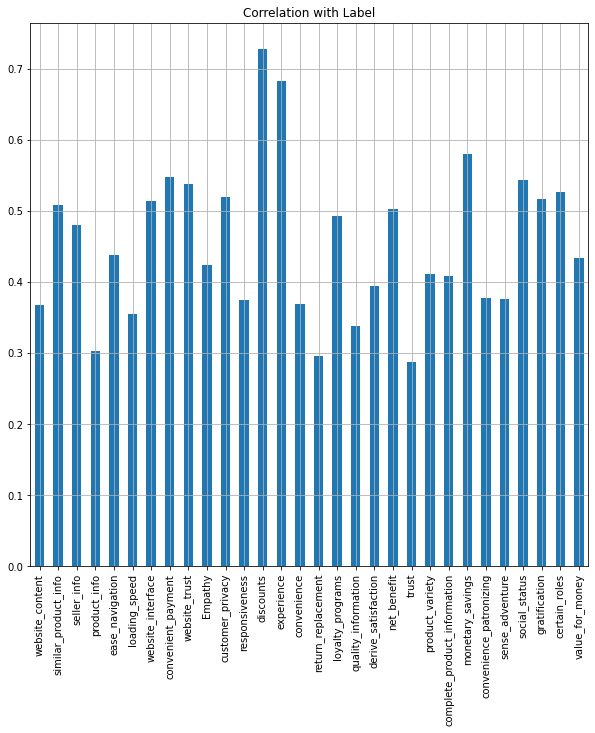

In [53]:
df6.drop('customer_retention_points',axis=1).corrwith(df6.customer_retention_points).plot(kind='bar',grid=True,figsize=(10,10),
                                                     title="Correlation with Label")
plt.show()

- Discount and experience has the highest co-relation with Customer retention points hence we conclude that to retain the customer the store should focus more on the discount and experience part.

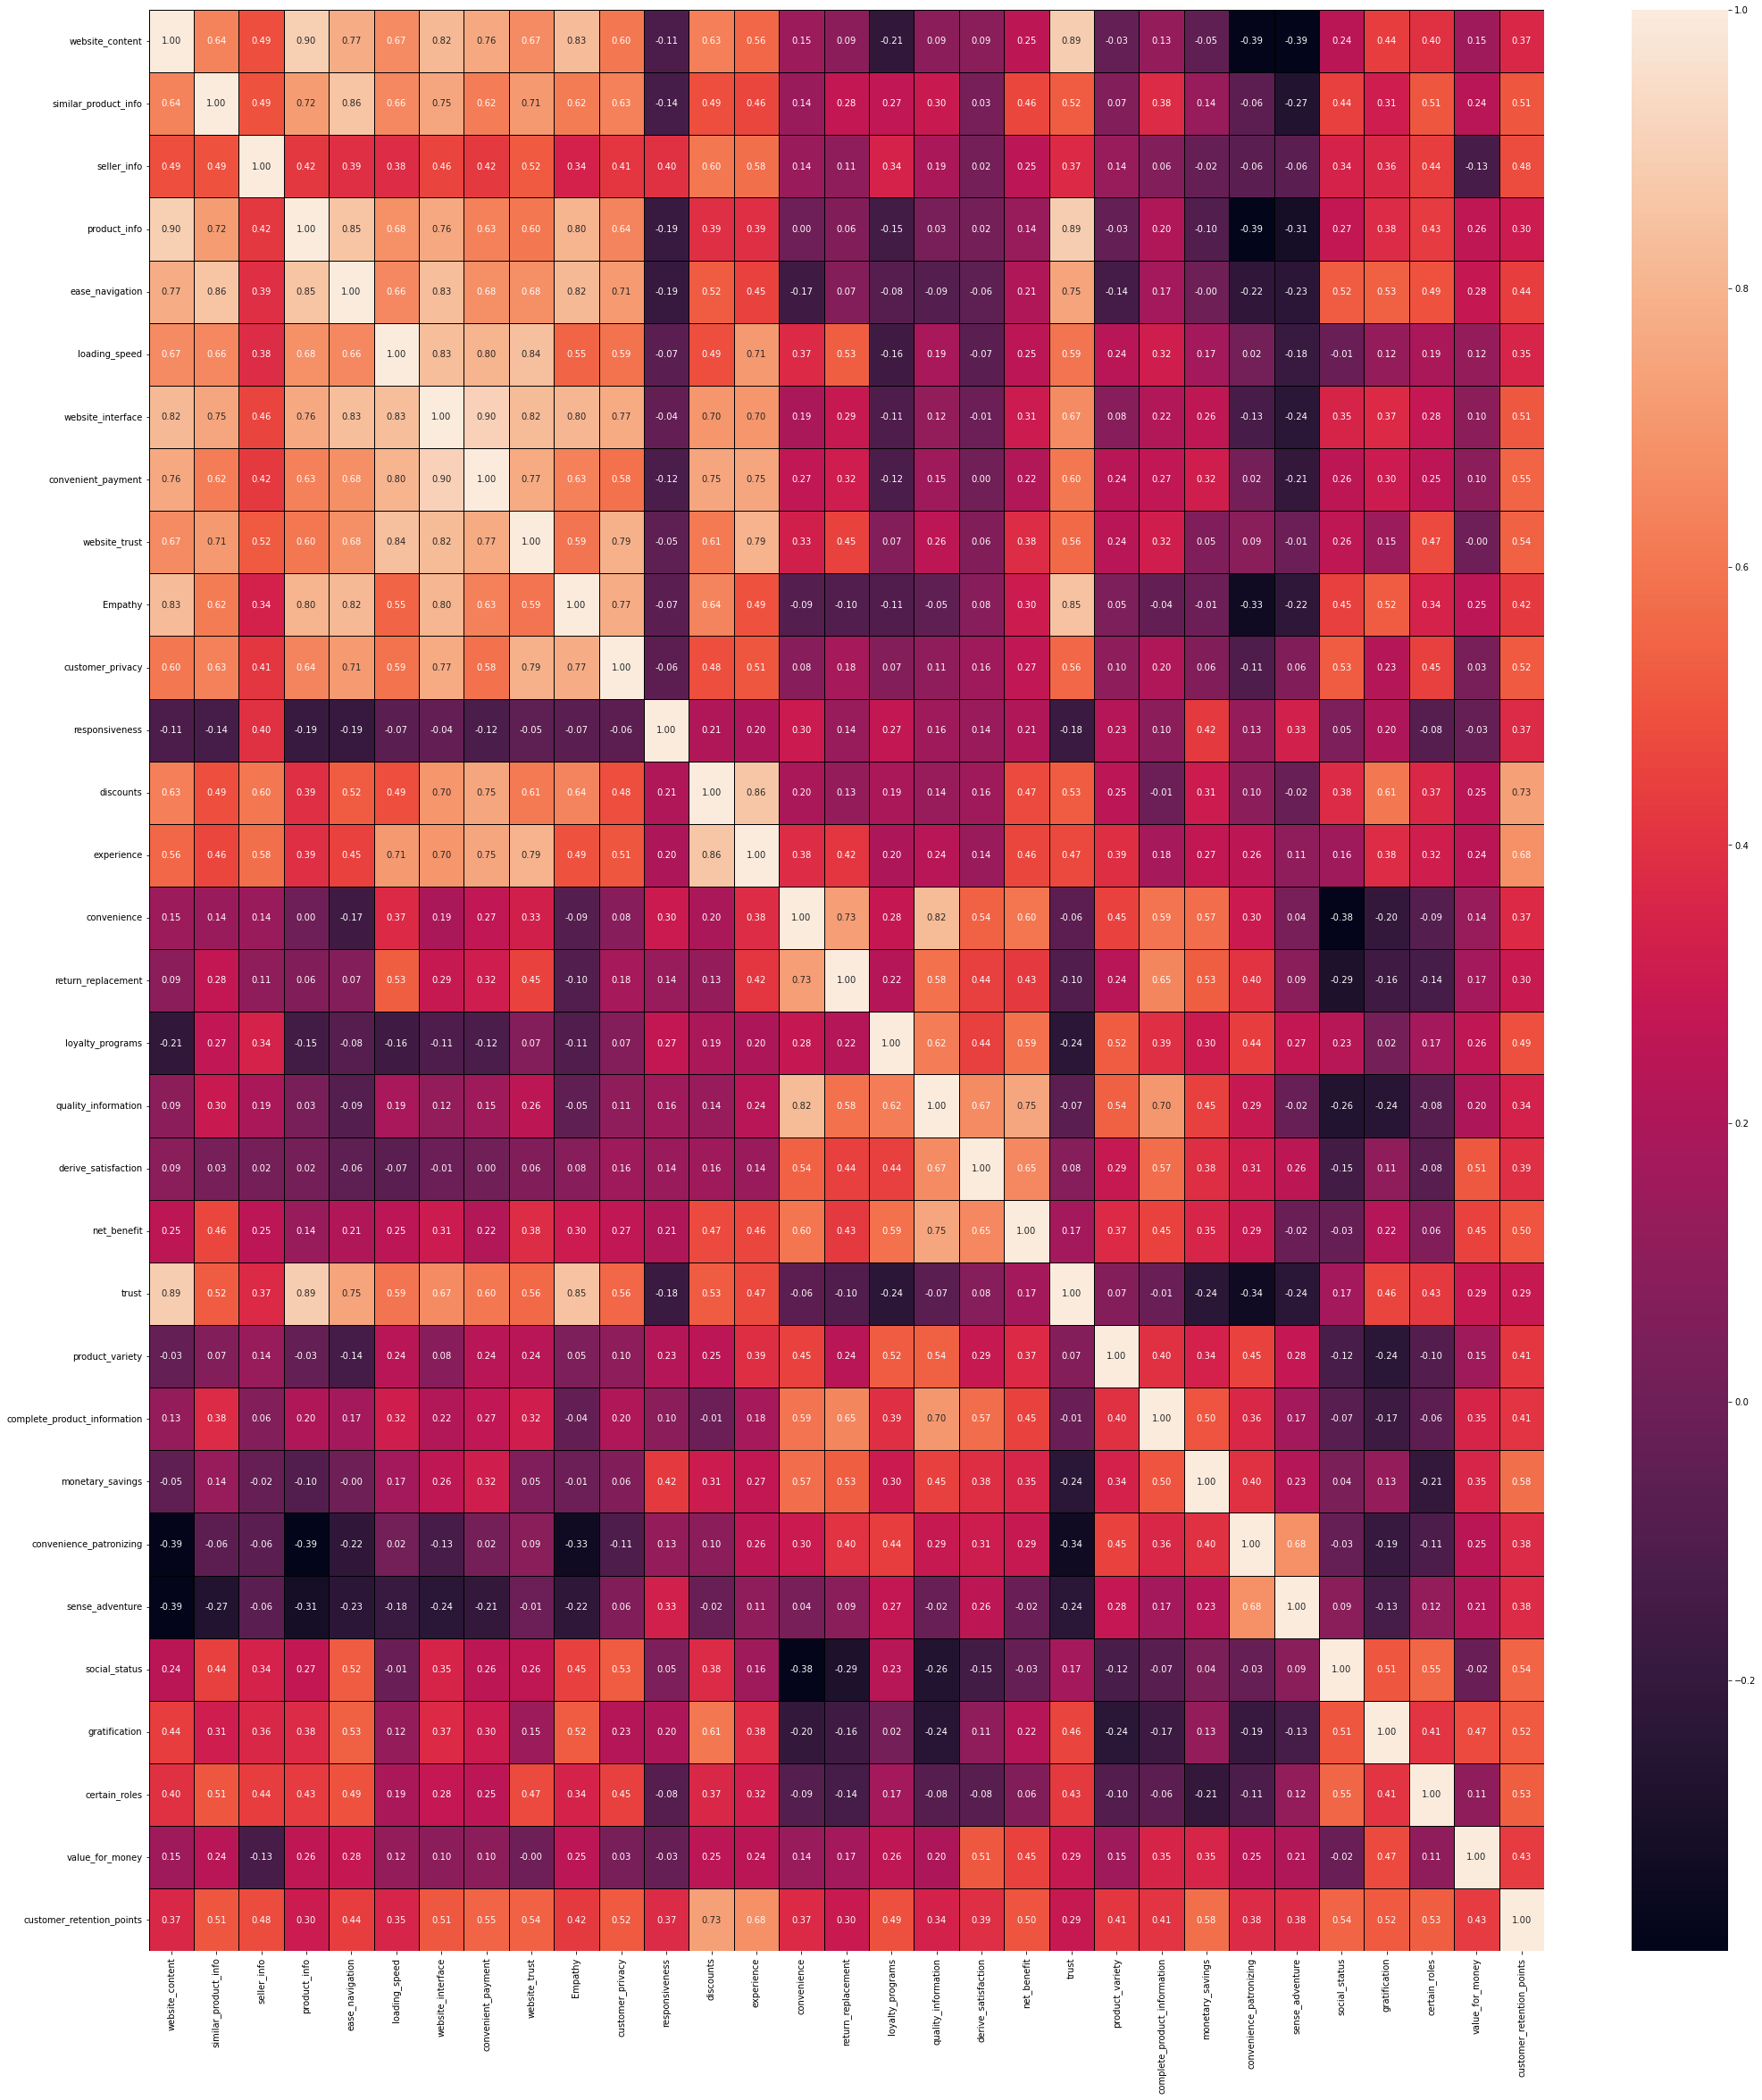

In [54]:
plt.figure(figsize = (35,40))
sns.heatmap(df6.corr(),annot=True, linewidths=0.5,linecolor='black',fmt = '.2f')
plt.show()

- website content and product info have multicollinearity problem
- website interface and convenient payment have multicollinearity problem

In [55]:
x = df['website_content']
y = df['product_info']

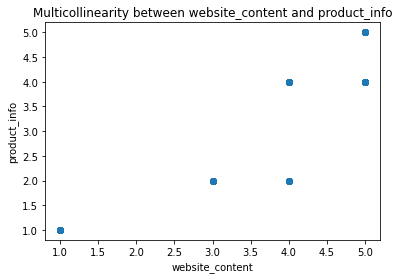

In [56]:
plt.scatter(x,y)
plt.xlabel('website_content')
plt.ylabel('product_info')
plt.title('Multicollinearity between website_content and product_info')
plt.show()

- The Multicollinearity problem exist between website content and product info

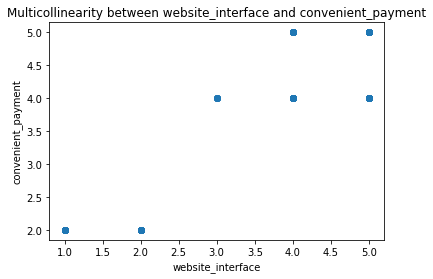

In [57]:
x = df['website_interface']  
y = df['convenient_payment']

plt.scatter(x,y)
plt.xlabel('website_interface')
plt.ylabel('convenient_payment')
plt.title('Multicollinearity between website_interface and convenient_payment')
plt.show()

- The Multicollinearity problem exist between website_interface and convenient_payment

In [58]:
x = df6.drop(['customer_retention_points'],axis=1)
y = df6['customer_retention_points']

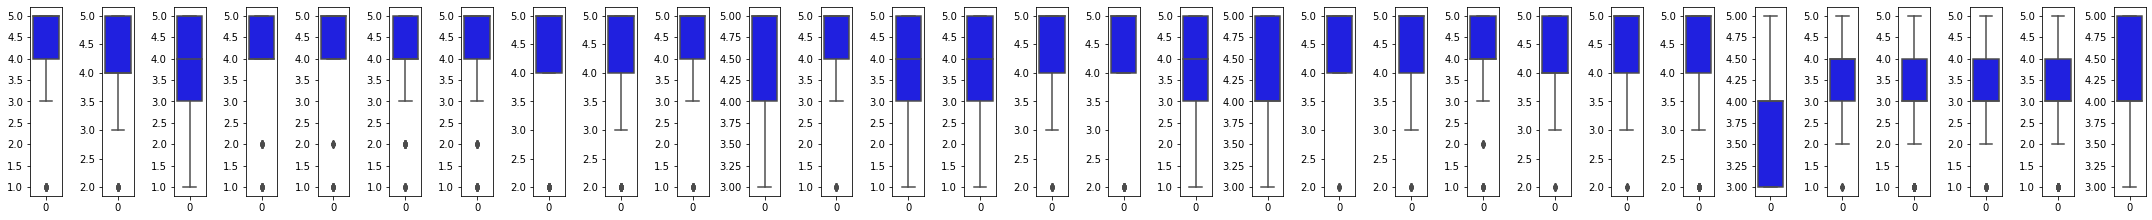

In [59]:
a = x.columns.values
col = 30
row = 14
plt.figure(figsize = (col,3*row))
for i in range(0, len(a)):
    plt.subplot(row,col,i+1)
    sns.boxplot(data = x[a[i]],color='blue',orient='v')
    plt.tight_layout()

- There are outliers in the data but since these are catogerical columns we can not remove outliers 

#### The data is ready to scale and build the model